In [1]:
from mylib.statistic_test import *
from mylib.dsp.neural_traj import preprocess_neural_traj, pca_dim_reduction

code_id = '0819 - Latent Space Orthogonality'
loc = os.path.join(figpath, 'Dsp', code_id)
mkdir(loc)

with open(r"E:\Data\Dsp_maze\10224\20231015\trace.pkl", 'rb') as handle:
    trace = pickle.load(handle)
    
res = preprocess_neural_traj(trace)
neural_traj = res['neural_traj']
pos_traj = res['pos_traj']
pos_traj_reord = res['pos_traj_reord']
segment_traj = res['traj_segment_ids']
lap_ids = res['traj_lap_ids']
route_ids = res['traj_route_ids']

e:\Anaconda\envs\maze\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        E:\Data\FinalResults\Dsp\0819 - Latent Space Orthogonality is already existed!


In [20]:
for i in range(1, 7):
    if i != 5:
        continue
    
    legal_route = np.intersect1d(
        CP_DSP[0], CP_DSP[i]
    )
    idx = np.where(
        (segment_traj == i) & (pos_traj_reord <= 111)
    )[0]
    
    """
    pca_reduced_data, pca = pca_dim_reduction(
        neural_traj[:, idx],
        n_components=30
    )
    P = pca.components_.T
    """
    pca_reduced_data = neural_traj[:, idx].T
    idx2 = np.where(
        route_ids[idx] == 0
    )[0]
    
    reduced_data1, lda1 = lda_dim_reduction(
        pca_reduced_data.T[:, idx2],
        lap_ids[idx][idx2],
        n_components=6,
        solver="eigen",
        shrinkage=0.05
    )
    
    reduced_data2, lda2 = lda_dim_reduction(
        pca_reduced_data.T,
        route_ids[idx],
        n_components=i,
        solver="eigen",
        shrinkage=0.05
    )
    
    reduced_data3, lda3 = lda_dim_reduction(
        pca_reduced_data.T,
        pos_traj[idx],
        n_components=6,
        solver="eigen",
        shrinkage=0.05
    )
    
    M, N = lda1.scalings_, lda2.scalings_
    O = lda3.scalings_

    idx1 = list(
        np.where(np.abs(M[:6, 0]) > 0.1)[0]
    )
    
    idx2 = list(
        np.where(np.abs(N) > 0.1)[0]
    )

    W1 = M
    W2 = N
    W3 = O
    """
    print(P.shape)
    W1 = P @ M
    W2 = P @ N
    W3 = P @ O
    print(W1.shape, W2.shape)
    """

0.4848863448821692 2.3699462290392224 0.3384398508386736
-1.0345219941699986 -0.43820964169987614 -0.3533723528489087
Time vs Route: 
  Condition number: 31.30417861653822
[3.47526318 3.45388283 3.45388283 3.45388283 3.45388283 3.45388283
 3.45388283 3.45388283 3.45388283 3.45388283 3.45370977 3.43775389
 3.43682814 3.42888807 3.42276063 3.41988163 3.41644618 3.40978774
 3.40526078 3.40149205 3.39860889 3.39000564 3.38622824 3.3772009
 3.37089328 3.36403577 3.35839817 3.34864876 3.34013936 3.32974971
 3.32712842 3.31817647 3.30688741 3.30108962 3.29173124 3.28066222
 3.27737305 3.26178454 3.25907914 3.24602781 3.23483282 3.22152957
 3.21209058 3.20747884 3.19790625 3.19277877 3.18824188 3.17036469
 3.16205865 3.15329126 3.14427886 3.12629645 3.12425486 3.10783985
 3.10318154 3.09549795 3.08702432 3.07653294 3.06022715 3.05045037
 3.0369461  3.02961878 3.02624757 3.01280499 2.9970434  2.99100633
 2.97988842 2.97390403 2.9556916  2.95269705 2.93469171 2.92750866
 2.91906349 2.91643386 2.

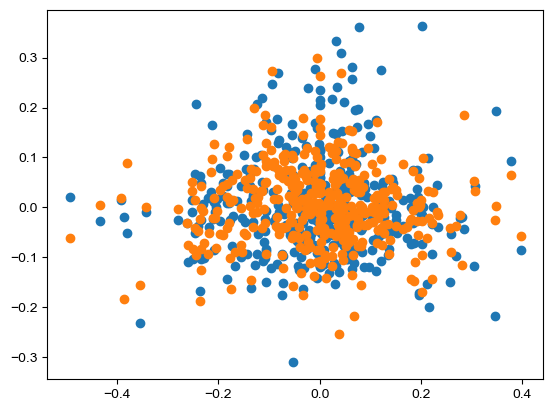

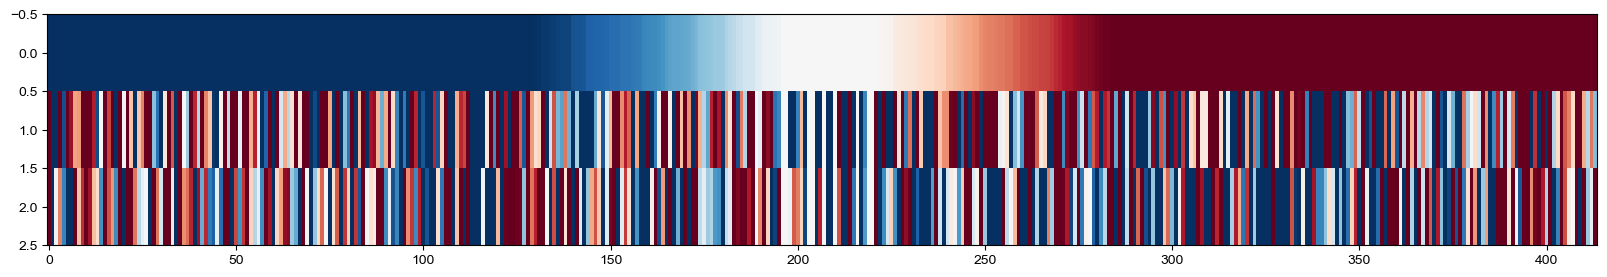

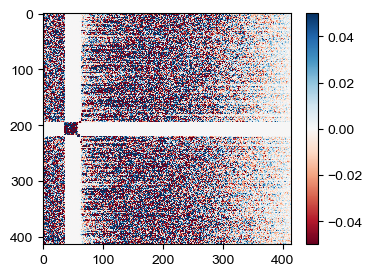

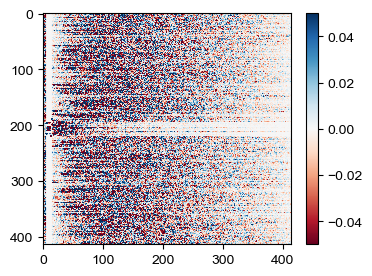

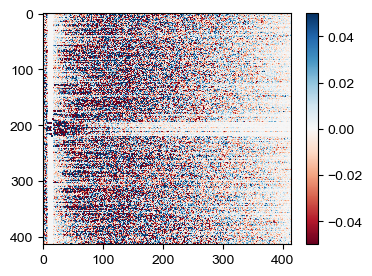

In [21]:
for i in range(M.shape[0]):
    sort_idx = np.argsort(W1[:, 0])[::-1]
    W1 = W1[sort_idx, :]
    W2 = W2[sort_idx, :]
    W3 = W3[sort_idx, :]

print(np.max(W1[:, :6]), np.max(W2[:, :6]), np.max(W3[:, :6]))
print(np.min(W1[:, :6]), np.min(W2[:, :6]), np.min(W3[:, :6]))

print("Time vs Route: ")
cond_number = np.linalg.cond(np.hstack([W1[:, :6], W2]))
print(f"  Condition number: {cond_number}")
u, s, vh = np.linalg.svd(np.hstack([W1[:, :6], W2]))
print(s)
print(f"  Smallest singular value: {s[-1]}",end='\n\n')

print("Time vs Position: ")
cond_number = np.linalg.cond(np.hstack([W1[:, :6], W3[:, :6]]))
print(f"  Condition number: {cond_number}")
u, s, vh = np.linalg.svd(np.hstack([W1[:, :6], W3[:, :6]]))
print(s)
print(f"  Smallest singular value: {s[-1]}", end='\n\n')

print("Route vs Position: ")
cond_number = np.linalg.cond(np.hstack([W2[:, :6], W3[:, :6]]))
print(f"  Condition number: {cond_number}")
u, s, vh = np.linalg.svd(np.hstack([W2[:, :6], W3[:, :6]]))
print(s)
print(f"  Smallest singular value: {s[-1]}")

plt.plot(W1[:, 0], W2[:, 0], 'o')
plt.plot(W1[:, 0], W3[:, 0], 'o')

print(np.linalg.matrix_rank(np.hstack([W1[:, :6], W2])), np.linalg.matrix_rank(W1[:, :6]), np.linalg.matrix_rank(W2))

fig = plt.figure(figsize=(20, 3))
ax = plt.axes()
ax.imshow(np.vstack([W1[:, 0], W2[:, 0], W3[:, 0]]), cmap='RdBu', vmin=-0.05, vmax=0.05)
ax.set_aspect('auto')
plt.show()

plt.figure(figsize=(4, 3))
ax = plt.axes()
im = ax.imshow(W1, cmap='RdBu', vmin=-0.05, vmax=0.05)
plt.colorbar(im)
ax.set_aspect('auto')
plt.show()


plt.figure(figsize=(4, 3))
ax = plt.axes()
im = ax.imshow(W2, cmap='RdBu', vmin=-0.05, vmax=0.05)
plt.colorbar(im)
ax.set_aspect('auto')
plt.show()

plt.figure(figsize=(4, 3))
ax = plt.axes()
im = ax.imshow(W3, cmap='RdBu', vmin=-0.05, vmax=0.05)
plt.colorbar(im)
ax.set_aspect('auto')
plt.show()

In [326]:
res = np.zeros(neural_traj.shape[1])

for i in range(neural_traj.shape[1]):
    Y1 = M[:2, :] @ neural_traj[:, i]
    Y2 = N[:2, :] @ neural_traj[:, i]
    res[i] = np.dot(Y1, Y2)/np.linalg.norm(Y1)/np.linalg.norm(Y2)

res_ctrl = np.zeros_like(res)
for i in range(neural_traj.shape[1]):
    X = np.random.rand(neural_traj.shape[0])
    Y1 = M[:2, :] @ X
    Y2 = N[:2, :] @ X
    res_ctrl[i] = np.dot(Y1, Y2)/np.linalg.norm(Y1)/np.linalg.norm(Y2)
    
idx = np.where(np.isnan(res) == True)[0]
print_estimator(res)
print(ttest_1samp(res, 0))
print_estimator(res_ctrl)
print(ttest_1samp(res_ctrl, 0))

C:\Users\12454\AppData\Local\Temp\ipykernel_19060\2138100459.py:6: RuntimeWarning: invalid value encountered in scalar divide
  res[i] = np.dot(Y1, Y2)/np.linalg.norm(Y1)/np.linalg.norm(Y2)


  Mean: 0.07296415947205769, STD: 0.7167363916840821, Max: 0.9999999985060198, Min: -0.999999987995722, Median: 0.16669404683018987
TtestResult(statistic=nan, pvalue=nan, df=nan)
  Mean: 0.8057842870654358, STD: 0.2641208030295541, Max: 0.9999999999524227, Min: -0.9999999963837753, Median: 0.9069265646585116
TtestResult(statistic=541.8873144618451, pvalue=0.0, df=31549)
